## Mean Squared Displacement stretegy
Treat the price like a particle trajectory and use tools from colloidal physics to analyse the data.

In [1]:
from signals import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
prices = load_ticker("EURUSD", 60)
close = prices.Close.reset_index(drop=True)

In [3]:
def msd(time_series):
    msd = []
    ssd = []
    for lag in range(1, len(time_series)-1):
        diffed = time_series.diff(lag)
        msd.append(diffed.pow(2).mean())
        #ssd.append(diffed.std())
    return msd, ssd

msds, _ = msd(close)

<IPython.core.display.Javascript object>


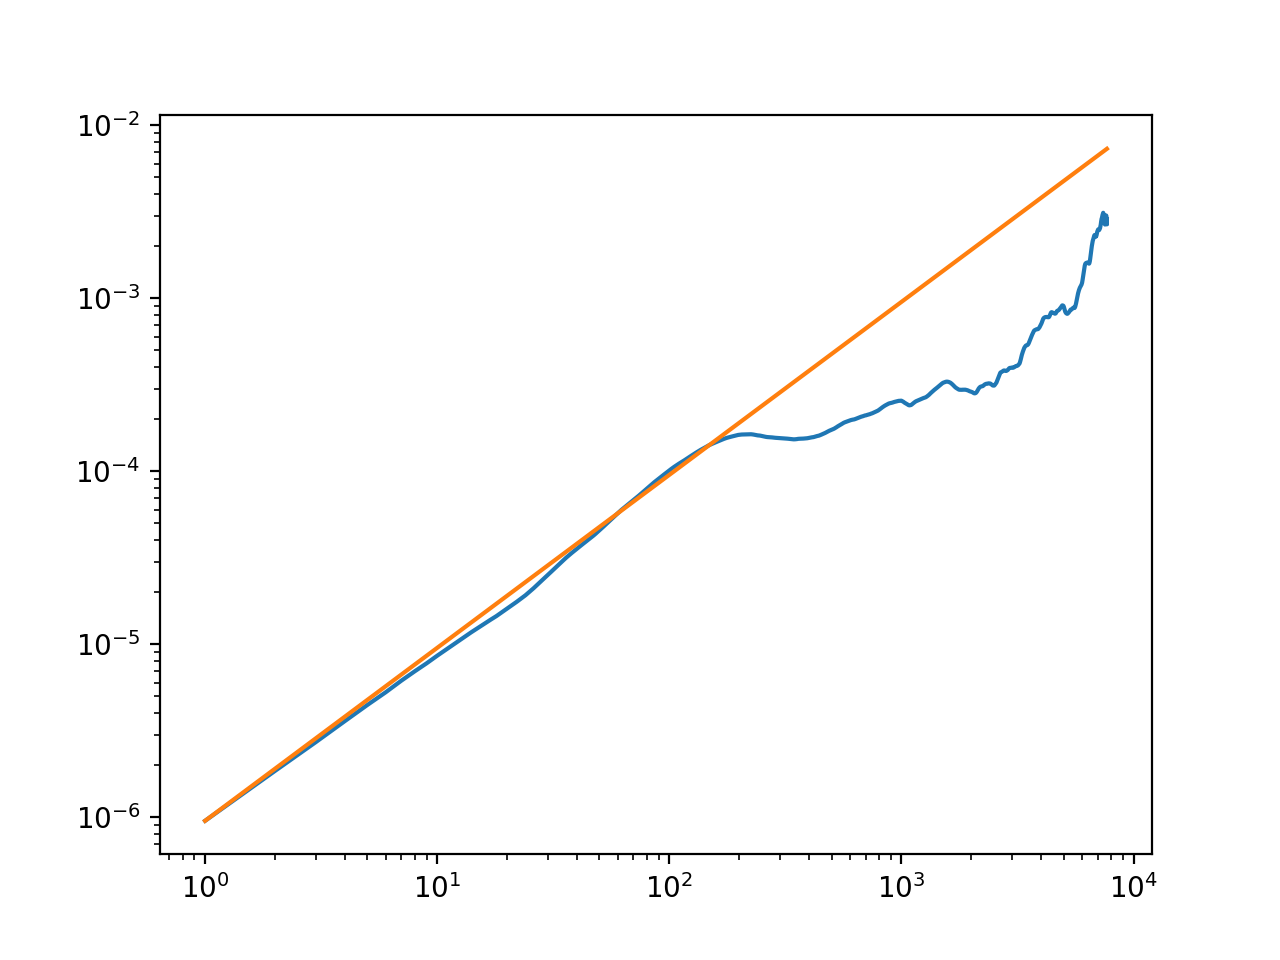

In [4]:
x_axis = range(1, len(msds) + 1)
linear = x_axis * msds[0]

plt.loglog(x_axis, msds)
plt.loglog(x_axis, linear)
plt.show()

Salient points:
200 hours lag, 0.0001442 (0.0120083304418) - MSD flat, second derivative negative.
400 hours lag, 0.00011116 (0.0105432442825)- MSD flat, second derivative positive.
(200,400) hours, MSD decreases.

(0.0120083304418 - 0.0105432442825) * 10,000 = 14.65 pips

Could this work:
1. Each hour, look at the close 200 hours back.
2. Set a trade, take profit of 14.65 pips in the direction of the lagged close.
3. Play with the Stop Loss to find a good value.
4. Close a trade that lasts longer than 200 hours (2 weeks)


In [ ]:
x_axis = range(1, len(msds) + 1)
linear = x_axis * msds[0]

#plt.subplot(111, xscale="log", yscale="log")
#plt.errorbar(x_axis, msds, yerr=ssds)
plt.plot(x_axis, msds)
plt.plot(x_axis, linear)
plt.show()